In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from pinns import *

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dev_str = f"{device.type}:{device.index}"

## Brusselator PDEs

> The Brusselator PDEs for two species are
<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>

for diffusion constants $D_u$, $D_v$, and model parameters $A, B > 0$.
Therefore, the kinetic terms are

<h3><center>$f(u,v) = A - (B+1)u + u^2v$</center></h3>
<h3><center>$g(u,v) = Bu - u^2 v$</center></h3>

<h3><center>$u^* = A$</center></h3>
<h3><center>$v^* = \frac{B}{A}$</center></h3>



In [3]:
def plot_n_im(arrays, titles=None, add_colorbar=True, figsize=(12, 8), fraction=0.15, shrink=1.0):
    cols = len(arrays)
    if titles is not None:
        assert len(titles) == cols, f"Titles len'{len(titles)}' is not equal to arrays '{col}'."
    plt.figure(figsize=figsize)
    for i in range(cols):
        ax = plt.subplot(1, cols, i+1)
        if titles is not None:
            ax.set_title(titles[i])
        img = plt.imshow(arrays[i])
        if add_colorbar:
            plt.colorbar(img, fraction=fraction, shrink=shrink)


In [4]:
def create_patch(x_slice, y_slice):
    xnp = np.arange(0, Ix).astype(np.int32)
    ynp = np.arange(0, Iy).astype(np.int32)
    xnp = np.arange(0, Ix).astype(np.int32)
    ynp = np.arange(0, Iy).astype(np.int32)
    Xnp, Ynp = np.meshgrid(xnp, ynp, indexing='ij')
    Xnp2, Ynp2 = np.meshgrid(xnp, ynp, indexing='ij')
    # Masking by zero
    Xnp2[x_slice, y_slice] *= 2
    Ynp2[x_slice, y_slice] *= 2
    Xnp = Xnp2 - Xnp
    Ynp = Ynp2 - Ynp
    points = np.vstack([Xnp.flatten(), Ynp.flatten()]).T

    inner_indices = np.argwhere(points != [0,0])
    inner_indices = inner_indices[::2, ::2].reshape(-1)
    #inner_points = points[inner_indices, :]

    Xnp, Ynp = np.meshgrid(xnp, ynp, indexing='ij')
    # Masking by maximum
    Xnp[x_slice, y_slice] = Ix+1
    Ynp[x_slice, y_slice] = Iy+1
    points = np.vstack([Xnp.flatten(), Ynp.flatten()]).T
    outter_indices = np.argwhere(points != [Ix+1,Iy+1])
    outter_indices = outter_indices[::2, ::2].reshape(-1)
    #outter_points = points[outter_indices, :]

    inner_indices = torch.tensor(inner_indices, dtype=torch.int32).to(device)
    outter_indices = torch.tensor(outter_indices, dtype=torch.int32).to(device)
    return inner_indices, outter_indices


Epoch: 1
loss boundary: 0.007007, loss physics: 84.834717, loss laplacian: 39.999912,  loss flux: 4799.315430
Laplacian U: 0.000003, Laplacian V: 0.000001


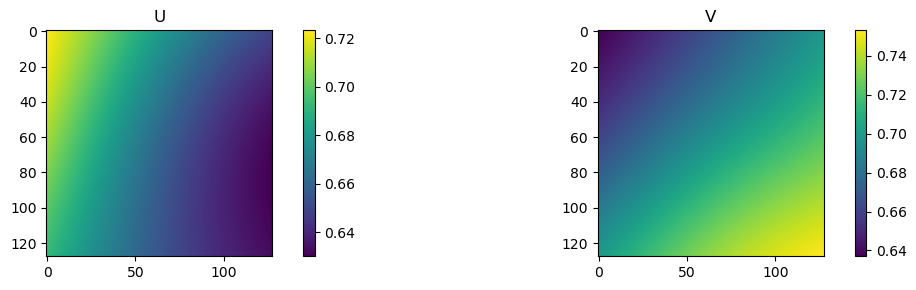

Epoch: 5000
loss boundary: 0.000000, loss physics: 9.386919, loss laplacian: 40.000000,  loss flux: 0.000014
Laplacian U: 0.000000, Laplacian V: 0.000000


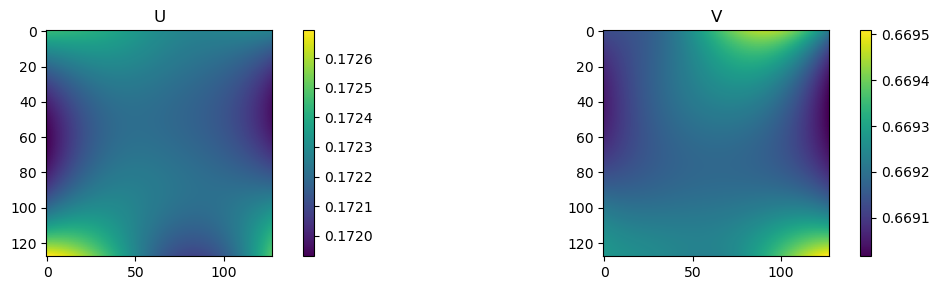

Epoch: 10000
loss boundary: 0.000000, loss physics: 9.386683, loss laplacian: 40.000000,  loss flux: 0.000002
Laplacian U: 0.000000, Laplacian V: 0.000000


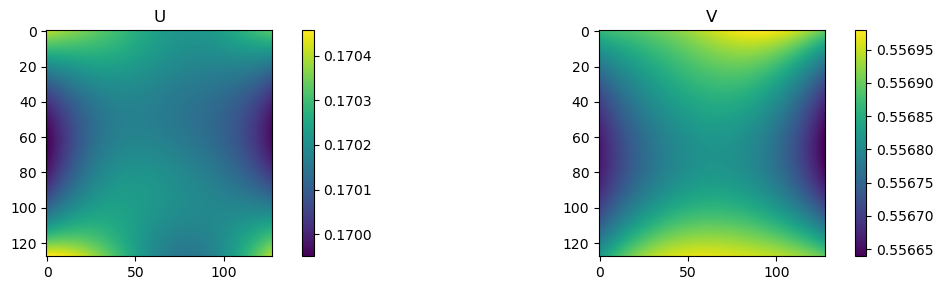

Epoch: 15000
loss boundary: 0.000973, loss physics: 2120.181641, loss laplacian: 5.996088,  loss flux: 108.064880
Laplacian U: 17.251198, Laplacian V: 24.735405


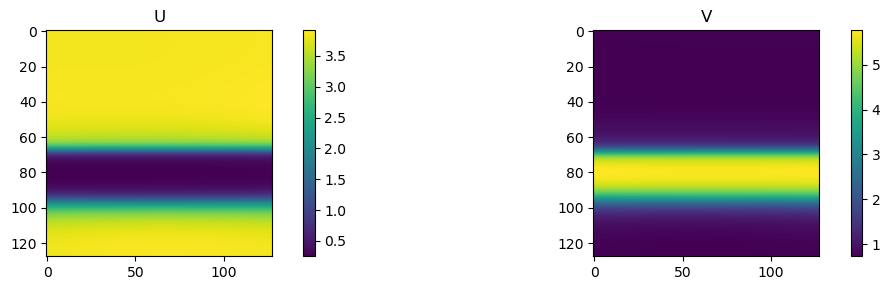

Epoch: 20000
loss boundary: 0.003325, loss physics: 1121.559570, loss laplacian: 0.000706,  loss flux: 37710.402344
Laplacian U: 102.312241, Laplacian V: 69.246056


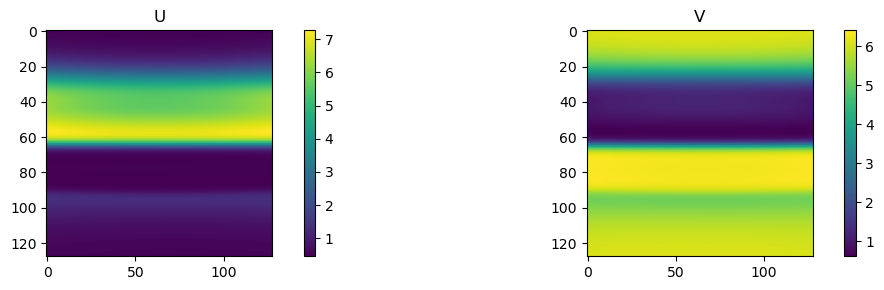

Epoch: 25000
loss boundary: 0.000134, loss physics: 1295.134521, loss laplacian: 0.000139,  loss flux: 1.432240
Laplacian U: 88.648163, Laplacian V: 60.926426


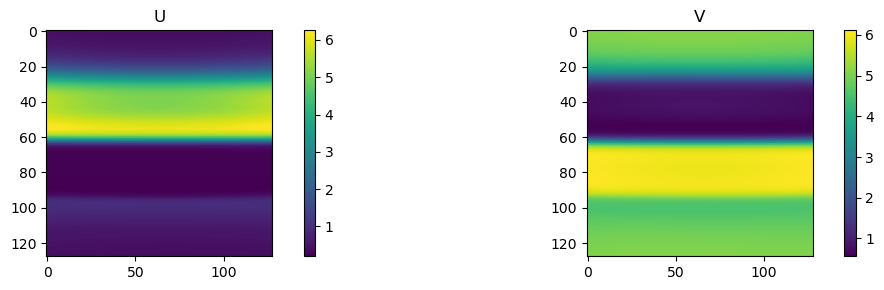

Epoch: 30000
loss boundary: 0.000573, loss physics: 745.066528, loss laplacian: 0.000031,  loss flux: 1508.990601
Laplacian U: 50.941532, Laplacian V: 45.523472


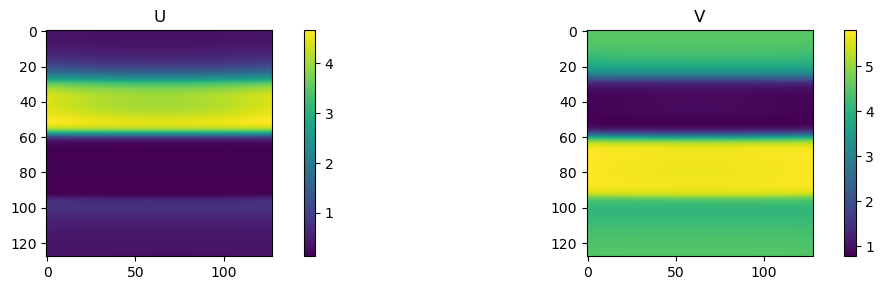

Epoch: 35000
loss boundary: 0.000075, loss physics: 336.131775, loss laplacian: 0.000013,  loss flux: 142.568741
Laplacian U: 24.361025, Laplacian V: 37.239185


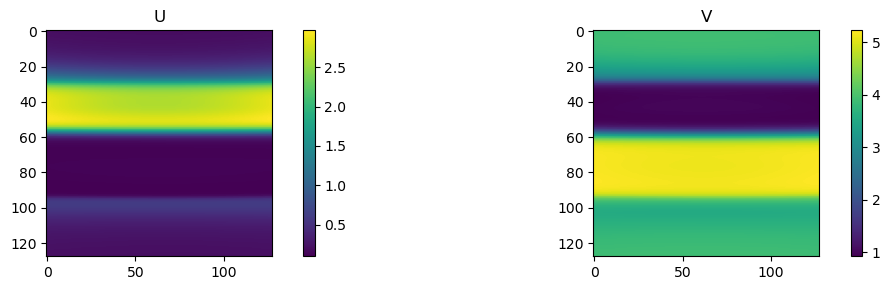

Epoch: 40000
loss boundary: 0.000056, loss physics: 116.766228, loss laplacian: 0.000008,  loss flux: 3.357774
Laplacian U: 14.980240, Laplacian V: 34.055099


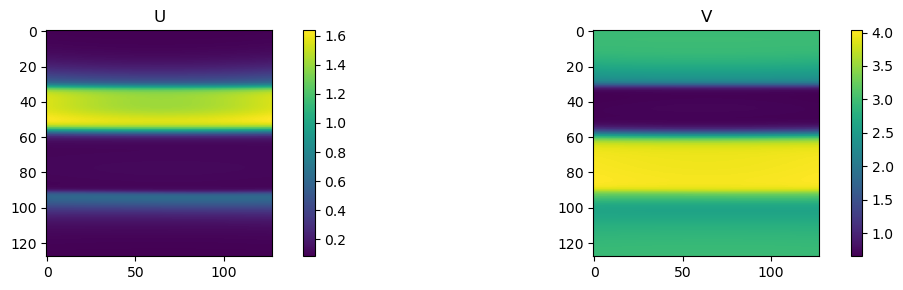

Epoch: 45000
loss boundary: 0.000010, loss physics: 71.693588, loss laplacian: 0.000005,  loss flux: 0.535162
Laplacian U: 16.762562, Laplacian V: 36.657089


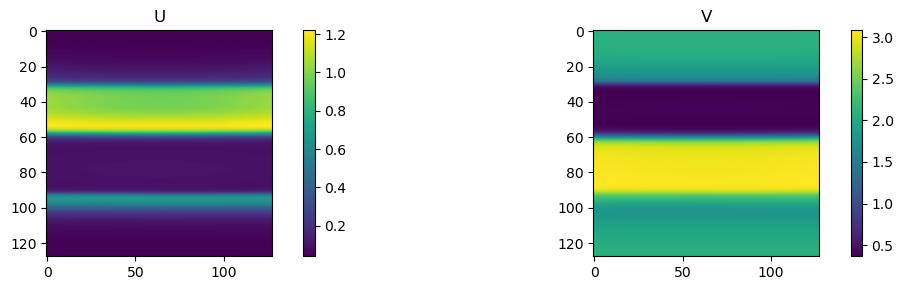

Epoch: 50000
loss boundary: 0.000798, loss physics: 55.923508, loss laplacian: 0.000012,  loss flux: 2.935700
Laplacian U: 15.874457, Laplacian V: 15.203194


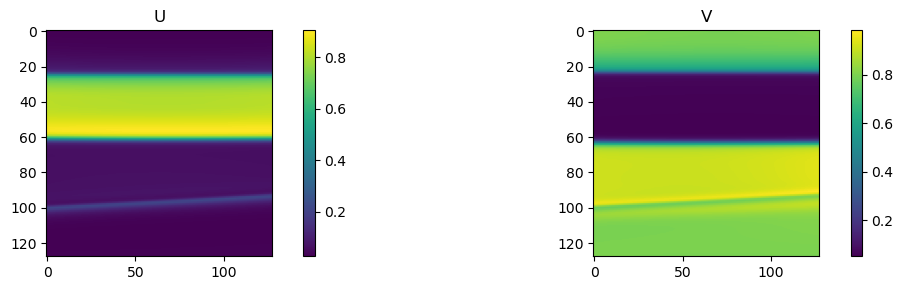

Epoch: 55000
loss boundary: 0.001611, loss physics: 36.391979, loss laplacian: 0.000020,  loss flux: 2.338866
Laplacian U: 14.570887, Laplacian V: 14.760459


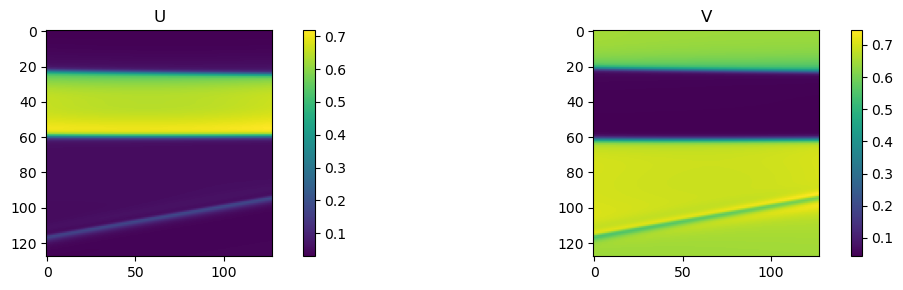

Epoch: 60000
loss boundary: 0.001637, loss physics: 26.404335, loss laplacian: 0.000030,  loss flux: 13.328959
Laplacian U: 14.260368, Laplacian V: 14.759563


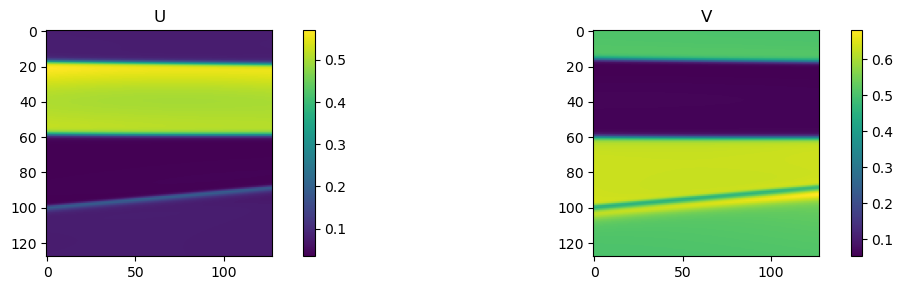

Epoch: 65000
loss boundary: 0.000243, loss physics: 40.420971, loss laplacian: 0.000003,  loss flux: 0.122567
Laplacian U: 16.598248, Laplacian V: 16.776655


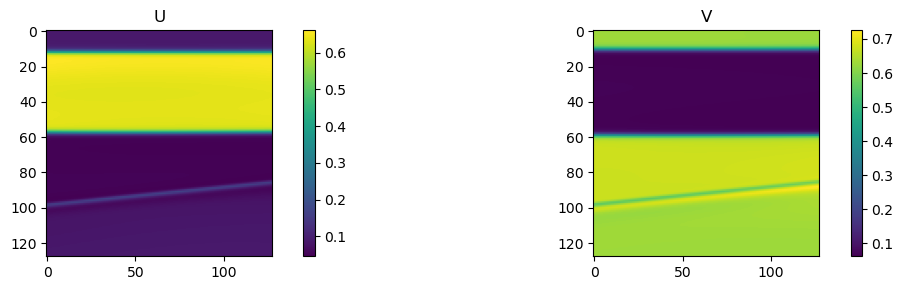

Epoch: 70000
loss boundary: 0.004884, loss physics: 18.644325, loss laplacian: 0.000042,  loss flux: 2.384422
Laplacian U: 14.539185, Laplacian V: 14.639748


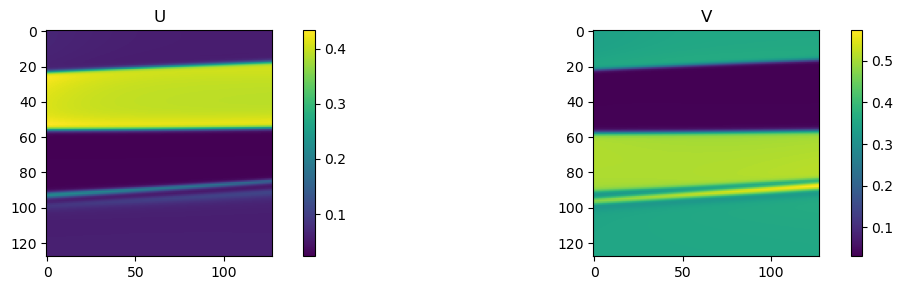

Epoch: 75000
loss boundary: 0.001122, loss physics: 17.343557, loss laplacian: 0.000009,  loss flux: 0.525425
Laplacian U: 17.528601, Laplacian V: 16.699341


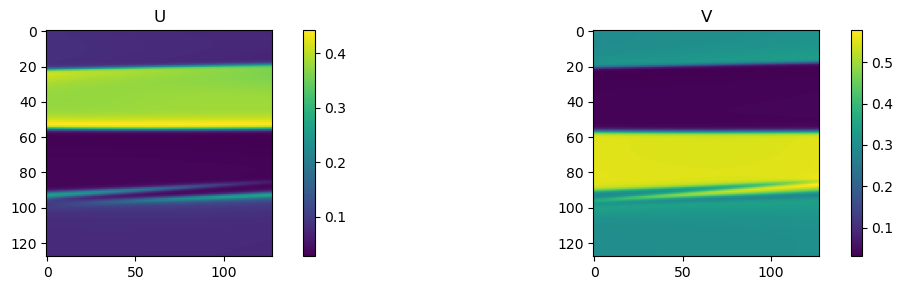

Epoch: 80000
loss boundary: 0.000408, loss physics: 23.338837, loss laplacian: 0.000006,  loss flux: 0.560409
Laplacian U: 17.425264, Laplacian V: 17.590569


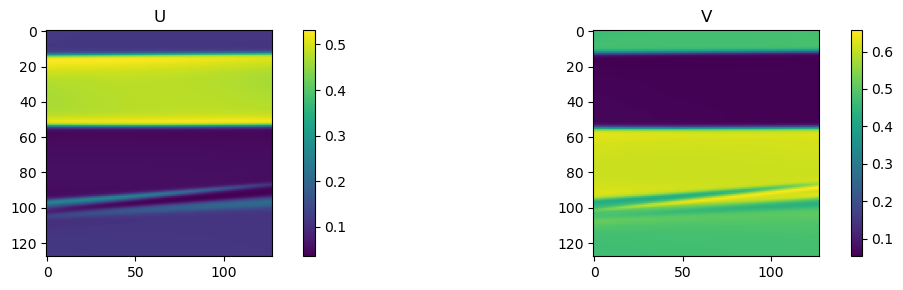

Epoch: 85000
loss boundary: 0.004816, loss physics: 36.834721, loss laplacian: 0.000141,  loss flux: 136.583832
Laplacian U: 22.301579, Laplacian V: 12.983758


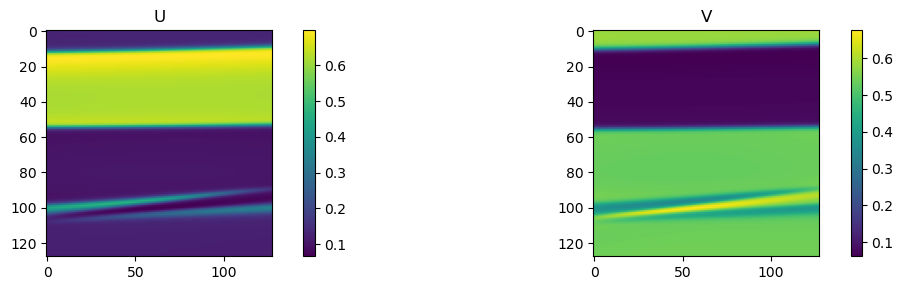

Epoch: 90000
loss boundary: 0.000056, loss physics: 34.665443, loss laplacian: 0.000002,  loss flux: 0.617810
Laplacian U: 19.808283, Laplacian V: 24.384743


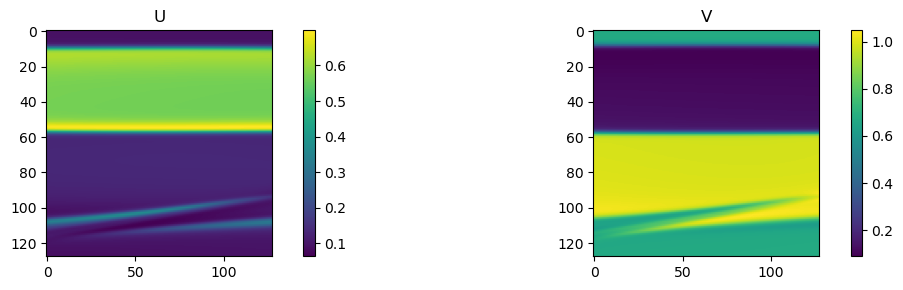

Epoch: 95000
loss boundary: 0.004154, loss physics: 13.410475, loss laplacian: 0.000032,  loss flux: 0.799961
Laplacian U: 16.206717, Laplacian V: 16.373503


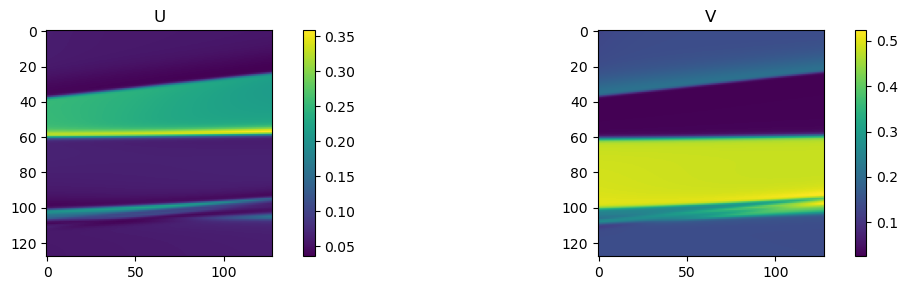

Epoch: 100000
loss boundary: 0.000993, loss physics: 12.692305, loss laplacian: 0.000009,  loss flux: 2.168077
Laplacian U: 19.636841, Laplacian V: 19.641884


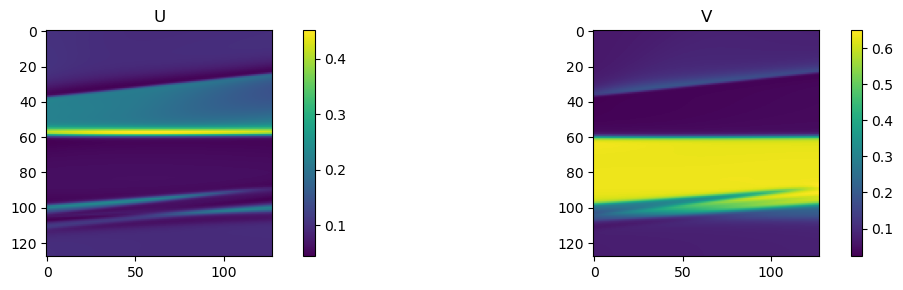

In [28]:
torch.manual_seed(42)
np.random.seed(42)

D_U = 0.0016
D_V = 0.0135

A, B = 4.5, 13.29
Lx, Ly= 10, 10
Ix, Iy = 128, 128
N = Ix*Iy
domain_bounds = torch.tensor([Lx, Ly]).to(device)
###############################################
# 
x = torch.linspace(0, Lx, Ix).to(device)
y = torch.linspace(0, Ly, Iy).to(device)
X,Y = torch.meshgrid(x, y, indexing='ij')
physics_X = torch.vstack([X.flatten(), Y.flatten()]).T
# To turn the tensor to a leaf node, we detach and clone it here
physics_X = physics_X.detach().clone()
physics_X.requires_grad = True
##############################################
#  Boundary points
#   For NEUMANN
# boundary_X_x = torch.hstack([x, 
#                              x,
#                              torch.ones_like(y)*x[0].item(), 
#                              torch.ones_like(y)*x[-1].item()])
# boundary_X_y = torch.hstack([torch.ones_like(x)*y[0].item(), 
#                              torch.ones_like(x)*y[-1].item(),
#                              y,
#                              y])
# boundary_X = torch.vstack([boundary_X_x, boundary_X_y]).T.requires_grad_(True)
#
#  Periodic boundary condition
boundary_X_x1 = torch.hstack([x, 
                              torch.ones_like(y)*x[0].item()])
boundary_X_y1 = torch.hstack([torch.ones_like(x)*y[0].item(), 
                              y])
boundary_X_x2 = torch.hstack([x, 
                              torch.ones_like(y)*x[-1].item()])
boundary_X_y2 = torch.hstack([torch.ones_like(x)*y[-1].item(), 
                              y])
boundary_X1 = torch.vstack([boundary_X_x1, boundary_X_y1]).T
boundary_X1.requires_grad_(True)

boundary_X2 = torch.vstack([boundary_X_x2, boundary_X_y2]).T
boundary_X2.requires_grad_(True)
###############################################
# Symmetry rotation
pi = np.pi
rotation_60 = torch.tensor([[np.cos(pi/3), -np.sin(pi/3)], 
                            [np.sin(pi/3), np.cos(pi/3)]], dtype=torch.float).to(device)
##############################################
# Inner region indices
inner_indices1, outter_indices1 = create_patch(slice(40, 80, 1), slice(40, 80, 1))
inner_indices2, outter_indices2 = create_patch(slice(1, 40, 1), slice(1, 40, 1))
inner_indices3, outter_indices3 = create_patch(slice(41, 80, 1), slice(1, 40, 1))
inner_indices4, outter_indices4 = create_patch(slice(81, 127, 1), slice(1, 40, 1))
inner_indices5, outter_indices5 = create_patch(slice(1, 40, 1), slice(41, 80, 1))
inner_indices6, outter_indices6 = create_patch(slice(41, 80, 1), slice(41, 80, 1))
inner_indices7, outter_indices7 = create_patch(slice(81, 127, 1), slice(41, 80, 1))
inner_indices8, outter_indices8 = create_patch(slice(1, 40, 1), slice(81, 127, 1))
inner_indices9, outter_indices9 = create_patch(slice(41, 80, 1), slice(81, 127, 1))
inner_indices10, outter_indices10 = create_patch(slice(81, 127, 1), slice(81, 127, 1))
indices = [(inner_indices1, outter_indices1),
           (inner_indices2, outter_indices2),
           (inner_indices3, outter_indices3),
           (inner_indices4, outter_indices4),
           (inner_indices5, outter_indices5),
           (inner_indices6, outter_indices6),
           (inner_indices7, outter_indices7),
           (inner_indices8, outter_indices8),
           (inner_indices9, outter_indices9),
           (inner_indices10, outter_indices10),
          ]
######################################

lb = torch.tensor([0., 0.]).to(device)
ub = torch.tensor([Lx, Ly]).to(device)
model = Net_dense_normalised([2, 64, 64, 64, 2], lb, ub).to(device)

optimizer = torch.optim.Adam([
                {'params': model.parameters()},
                ], lr=1e-3, weight_decay=0.0000)
epochs = 100000
loss_boundary = 0.0
lambda_boundary = 1000#torch.nn.Parameter(torch.ones(1, device=f"{device.type}:{device.index}"))*0.5#1.0
loss_physics = 0.0
lambda_physics = 5e-3#torch.nn.Parameter(torch.ones(1, device=f"{device.type}:{device.index}"))*0.5#5e-3
loss_laplacian = 0.0
lambda_laplacian = 10000
loss_flux = 0.0
lambda_flux = 1e-1
loss_symmetry = 0.0
lambda_symmetry = 1

losses = np.zeros((4, epochs))
laplacian_values = np.zeros((2, epochs))
for i in range(epochs):
    optimizer.zero_grad()

    #################################
    # boundary loss    
#     boundary_f_hat = model(boundary_X).squeeze()
#     U = boundary_f_hat[:,0]
#     V = boundary_f_hat[:,1]
#     dUdx, dUdy  = XY_gradient(U, boundary_X)
#     dVdx, dVdy  = XY_gradient(V, boundary_X)    

#     loss_boundary = torch.mean(dUdx**2) + torch.mean(dUdy**2) + torch.mean(dVdx**2) + torch.mean(dVdy**2)
    boundary_f_hat1 = model(boundary_X1).squeeze()
    U1 = boundary_f_hat1[:,0]
    V1 = boundary_f_hat1[:,1]
    boundary_f_hat2 = model(boundary_X2).squeeze()
    U2 = boundary_f_hat2[:,0]
    V2 = boundary_f_hat2[:,1]

    loss_boundary = torch.mean((U1-U2)**2 + (V1-V2)**2) 
    #################################
    # physics derivatives
    #physics_X = torch.rand((N,2), requires_grad=True ,device=dev_str)*domain_bounds
    physics_f_hat = model(physics_X).squeeze()
    U = physics_f_hat[:,0]
    V = physics_f_hat[:,1]
    
    laplacianU = Laplacian(U, physics_X)
    laplacianV = Laplacian(V, physics_X)
        
    FU = A - (B + 1) * U + U*U*V
    FV = B * U - U*U*V
    
    dudt = D_U * laplacianU + FU
    dvdt = D_V * laplacianV + FV
    ################################
    # physics loss
    # Construct the physics loss here
    loss_physics = torch.mean(dudt**2 + dvdt**2)
    ###############################
    #
    def loss_parts(inner_indices, outter_indices):
        inner_laplacianU = laplacianU[inner_indices]
        outter_laplacianU = laplacianU[outter_indices]

        inner_laplacianV = laplacianV[inner_indices]
        outter_laplacianV = laplacianV[outter_indices]

        l_laplacian = torch.exp(torch.mean(-inner_laplacianU**2)
                                  ) + torch.exp(torch.mean(-outter_laplacianU**2)
                                  ) + torch.exp(torch.mean(-inner_laplacianV**2)
                                  ) + torch.exp(torch.mean(-outter_laplacianV**2)
                                  )
        l_flux = (torch.sum(inner_laplacianU) - torch.sum(outter_laplacianU))**2
        l_flux += (torch.sum(inner_laplacianV) - torch.sum(outter_laplacianV))**2
        return (l_laplacian, l_flux)
    
    loss_laplacian, loss_flux = loss_parts(*indices[0])
    for inner, outter in indices[1:]:
        two_l2 = loss_parts(inner, outter)
        loss_laplacian += two_l2[0] 
        loss_flux += two_l2[1]
    
    ###############################
    # 60 degree rotational symmetry
#     def centred(x):
#         return x - 2.0
#     def transformed_back(x):
#         return x + 2.0
#     physics_X_60 = torch.matmul(rotation_60, centred(physics_X.T)).T
#     physics_X_120 = torch.matmul(rotation_60, physics_X_60.T).T
#     physics_X_180 = torch.matmul(rotation_60, physics_X_120.T).T
#     physics_X_60 = transformed_back(physics_X_60)
#     physics_X_120 = transformed_back(physics_X_120)
#     physics_X_180 = transformed_back(physics_X_180)
#     physics_f_hat_60= model(physics_X_60).squeeze()
#     physics_f_hat_120= model(physics_X_120).squeeze()
#     physics_f_hat_180= model(physics_X_180).squeeze()
#     loss_symmetry = torch.mean((physics_f_hat - physics_f_hat_60)**2
#                               ) +  torch.mean((physics_f_hat_60 - physics_f_hat_120)**2
#                               ) +  torch.mean((physics_f_hat_180 - physics_f_hat_120)**2
#                               )
    ################################
    # Zero Laplacian penalty    
#     U_60 = physics_f_hat_60[:,0]
#     V_60 = physics_f_hat_60[:,1]
#     U_120 = physics_f_hat_120[:,0]
#     V_120 = physics_f_hat_120[:,1]
#     U_180 = physics_f_hat_180[:,0]
#     V_180 = physics_f_hat_180[:,1]
#     laplacianU_60 = Laplacian(U_60, physics_X_60)
#     laplacianV_60 = Laplacian(V_60, physics_X_60)
#     laplacianU_120 = Laplacian(U_120, physics_X_120)
#     laplacianV_120 = Laplacian(V_120, physics_X_120)
#     laplacianU_180 = Laplacian(U_180, physics_X_180)
#     laplacianV_180 = Laplacian(V_180, physics_X_180)
#     loss_laplacian = torch.exp(torch.mean(-laplacianU**2)
#                     ) + torch.exp(torch.mean(-laplacianV**2)
#                     ) + torch.exp(torch.mean(-laplacianU_60**2)
#                     ) + torch.exp(torch.mean(-laplacianV_60**2)
#                     ) + torch.exp(torch.mean(-laplacianU_120**2)
#                     ) + torch.exp(torch.mean(-laplacianV_120**2)
#                     ) + torch.exp(torch.mean(-laplacianU_180**2)
#                     ) + torch.exp(torch.mean(-laplacianV_180**2)
#                     )
    
    total_loss = (
        +lambda_boundary*loss_boundary
        +lambda_physics*loss_physics 
        +lambda_laplacian*loss_laplacian
        +lambda_flux*loss_flux
        #+lambda_symmetry*loss_symmetry
                    )
    
    
    total_loss.backward(retain_graph=True)
    
    optimizer.step()
    
    losses[:,i] = (loss_boundary.item(), loss_physics.item(),
                   loss_laplacian.item(), loss_flux.item())
    laplacian_values [:,i] = (torch.mean(laplacianU**2).item(),torch.mean(laplacianV**2).item())
        
    
    if (i+1)%5000 == 0 or i==0:
        print(f"Epoch: {i+1}")
        print(f"loss boundary: {losses[0,i]:.6f}, loss physics: {losses[1,i]:.6f},"
              f" loss laplacian: {losses[2,i]:.6f},  loss flux: {losses[3,i]:.6f}")
        print(f"Laplacian U: {laplacian_values[0,i]:.6f}, Laplacian V: {laplacian_values[1,i]:.6f}")
        physics_f_hat = model(physics_X)        
        U_hat = physics_f_hat[:, 0].reshape((128,128))
        V_hat = physics_f_hat[:, 1].reshape((128,128))
        plot_n_im([U_hat.cpu().detach().numpy(), 
                   V_hat.cpu().detach().numpy()], 
           ["U","V"],          
        figsize=(12, 3)); plt.tight_layout();plt.show()

In [103]:
laplacianU.shape, inner_points.shape

(torch.Size([16384]), torch.Size([1600, 2]))

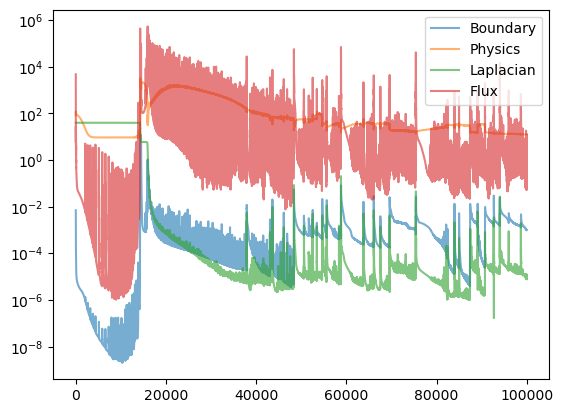

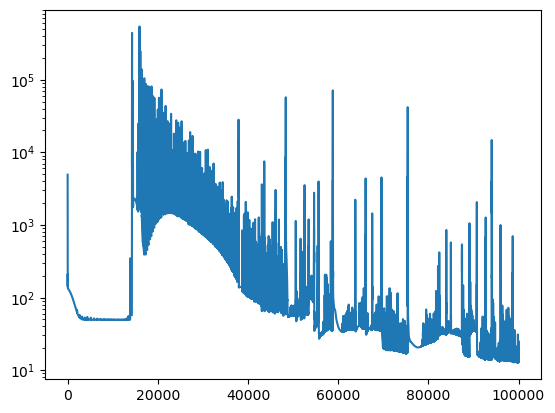

In [29]:

plt.plot(losses[0,:], alpha=.6, label="Boundary")
plt.plot(losses[1,:], alpha=.6, label="Physics")
plt.plot(losses[2,:], alpha=.6, label="Laplacian")
plt.plot(losses[3,:], alpha=.6, label="Flux")
plt.yscale('log');plt.legend() ;plt.show()
plt.plot(np.sum(losses, axis=0))
plt.yscale('log');plt.show()


In [30]:
def plot_surf(ax, X,Y, sol, scatter=False):    
    if scatter:
        ax.scatter(X,Y,sol, marker='.')
    else:
        ax.plot_surface(X,Y,sol)
    

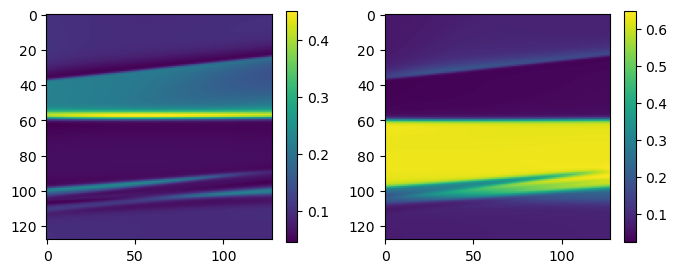

In [31]:
solution = model(physics_X).cpu().detach()
U_hat = solution[:, 0].reshape((128,128))
V_hat = solution[:, 1].reshape((128,128))
index = -1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_hat)
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(V_hat)
plt.colorbar(shrink=.75)
plt.show()

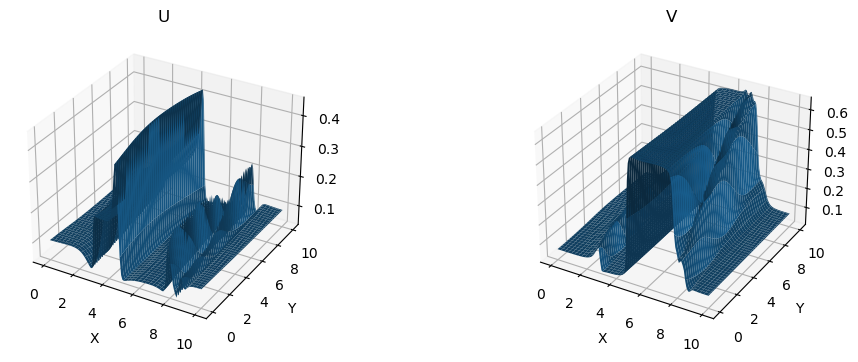

In [32]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1,projection='3d')

plot_surf(ax, physics_X[:,0].cpu().detach().reshape((128,128)), 
          physics_X[:,1].cpu().detach().reshape((128,128)),
          U_hat,
          scatter=False)
plt.title("U"); plt.xlabel("X"); plt.ylabel("Y")    

ax = fig.add_subplot(1,2,2,projection='3d')
plot_surf(ax, physics_X[:,0].cpu().detach().reshape((128,128)), 
          physics_X[:,1].cpu().detach().reshape((128,128)),
          V_hat,
          scatter=False)
plt.title("V"); plt.xlabel("X"); plt.ylabel("Y")    
plt.show()

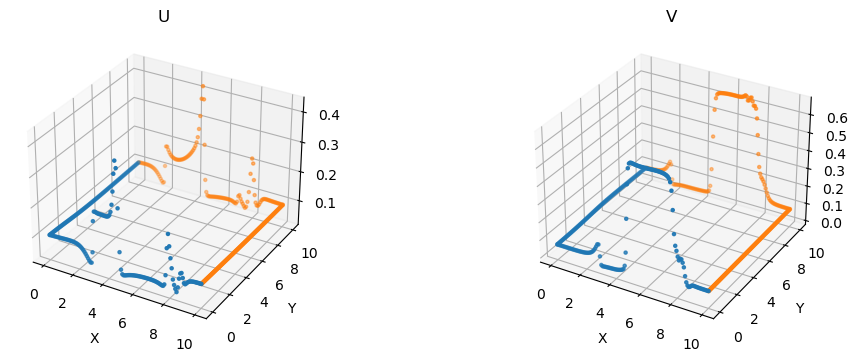

In [34]:
boundary_solution1 = model(boundary_X1).cpu().detach()
boundary_solution2 = model(boundary_X2).cpu().detach()
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1,projection='3d')

plot_surf(ax, 
          boundary_X1[:,0].cpu().detach(), 
          boundary_X1[:,1].cpu().detach(),
          boundary_solution1[:,0],
          scatter=True)
plot_surf(ax, 
          boundary_X2[:,0].cpu().detach(), 
          boundary_X2[:,1].cpu().detach(),
          boundary_solution2[:,0],
          scatter=True)
plt.title("U"); plt.xlabel("X"); plt.ylabel("Y")    

ax = fig.add_subplot(1,2,2,projection='3d')
plot_surf(ax, 
          boundary_X1[:,0].cpu().detach(), 
          boundary_X1[:,1].cpu().detach(),
          boundary_solution1[:,1],
          scatter=True)
plot_surf(ax, 
          boundary_X2[:,0].cpu().detach(), 
          boundary_X2[:,1].cpu().detach(),
          boundary_solution2[:,1],
          scatter=True)
plt.title("V"); plt.xlabel("X"); plt.ylabel("Y")    
plt.show()
